In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/df_no_outliers.csv')

df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,id,date,yr_renovated,zipcode,lat,long,view,waterfront,month,decade_built
0,0,993000.0,4,2.00,2850,14810,2.0,5,8,2490,...,824059083,2014-09-02,0,98004,47.5892,-122.203,0,0,9,1950
1,1,991700.0,4,3.00,2290,2350,2.0,3,9,1610,...,375000165,2014-07-23,2011,98116,47.5740,-122.415,1,0,7,1920
2,2,990400.0,3,2.50,2100,4097,2.0,3,9,2100,...,524059323,2015-02-19,0,98004,47.5983,-122.200,0,0,2,2000
3,3,990000.0,3,2.75,2500,6350,2.0,5,9,2370,...,9829200580,2014-09-17,0,98122,47.6035,-122.285,0,0,9,1970
4,4,990000.0,4,3.75,3450,4940,2.0,3,10,2570,...,3047700105,2015-04-23,0,98103,47.6920,-122.338,0,0,4,2000


In [21]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,sqft_lot15,id,yr_renovated,zipcode,lat,long,view,waterfront,month,decade_built
count,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,...,16375.000000,1.637500e+04,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000
mean,8187.000000,442472.321405,3.222595,1.960412,1795.179176,6874.934473,1.462809,3.410565,7.372031,1563.901313,...,6809.344061,4.764787e+09,67.134534,98082.491359,47.559051,-122.231877,0.120794,0.001038,6.577527,1964.748092
std,4727.199664,180931.210577,0.795187,0.654022,604.077199,3171.778391,0.543955,0.643520,0.878318,588.009201,...,2888.211838,2.871255e+09,359.797206,53.885474,0.139565,0.131808,0.523951,0.032205,3.120707,30.042045
min,0.000000,82000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,2.000000,5.000000,370.000000,...,651.000000,2.800031e+06,0.000000,98001.000000,47.155900,-122.475000,0.000000,0.000000,1.000000,1900.000000
25%,4093.500000,300000.000000,3.000000,1.500000,1330.000000,4662.500000,1.000000,3.000000,7.000000,1130.000000,...,4800.000000,2.325400e+09,0.000000,98034.000000,47.468300,-122.339000,0.000000,0.000000,4.000000,1940.000000
50%,8187.000000,410500.000000,3.000000,2.000000,1730.000000,6947.000000,1.000000,3.000000,7.000000,1420.000000,...,7035.000000,4.077800e+09,0.000000,98074.000000,47.568300,-122.273000,0.000000,0.000000,6.000000,1970.000000
75%,12280.500000,554839.500000,4.000000,2.500000,2200.000000,8841.500000,2.000000,4.000000,8.000000,1890.000000,...,8623.500000,7.518505e+09,0.000000,98119.000000,47.681000,-122.156000,0.000000,0.000000,9.000000,1990.000000
max,16374.000000,993000.000000,5.000000,3.750000,3620.000000,16575.000000,3.000000,5.000000,10.000000,3340.000000,...,15586.000000,9.900000e+09,2015.000000,98199.000000,47.777600,-121.315000,4.000000,1.000000,12.000000,2010.000000


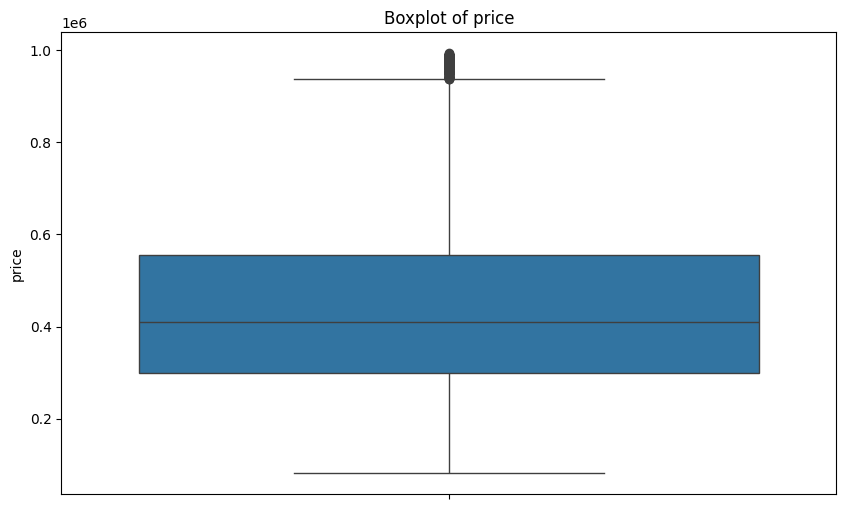

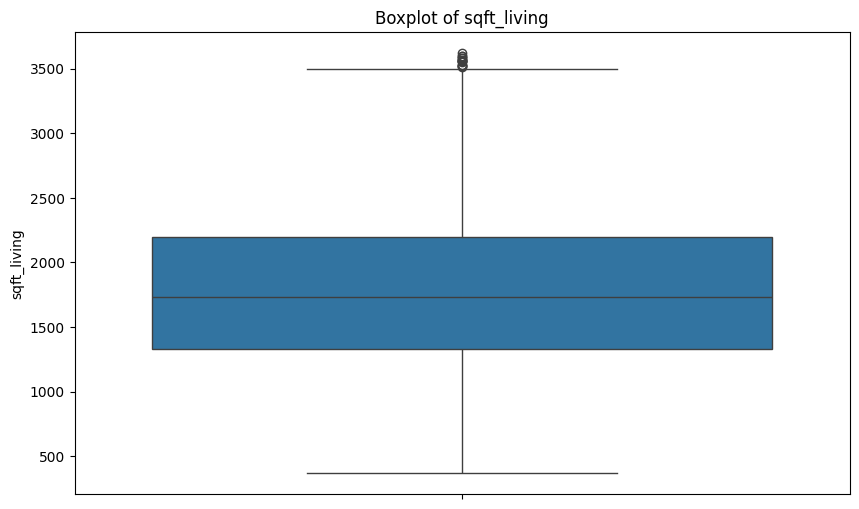

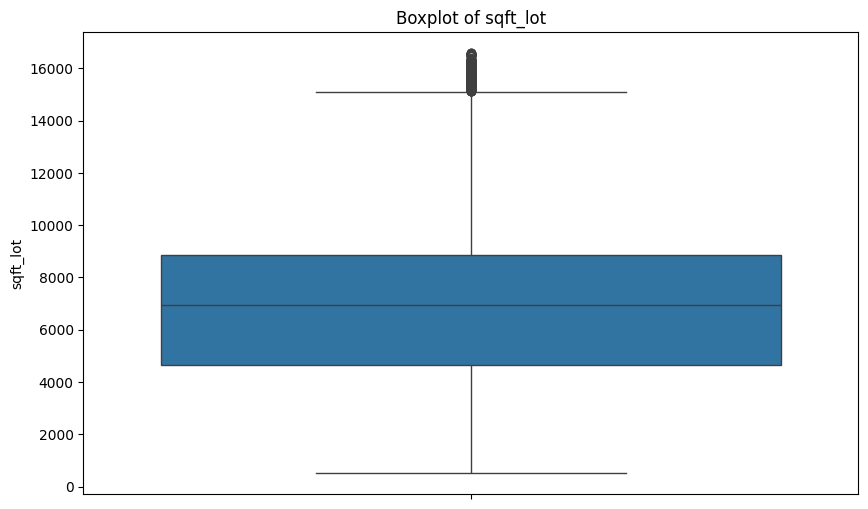

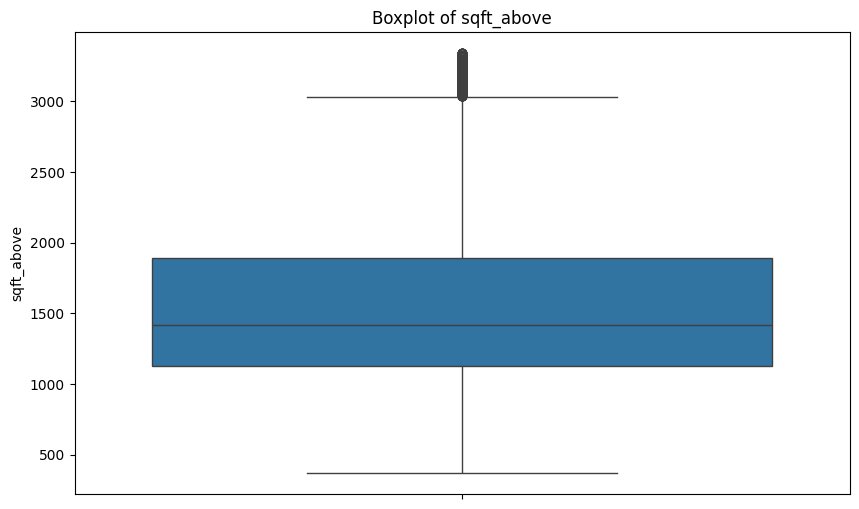

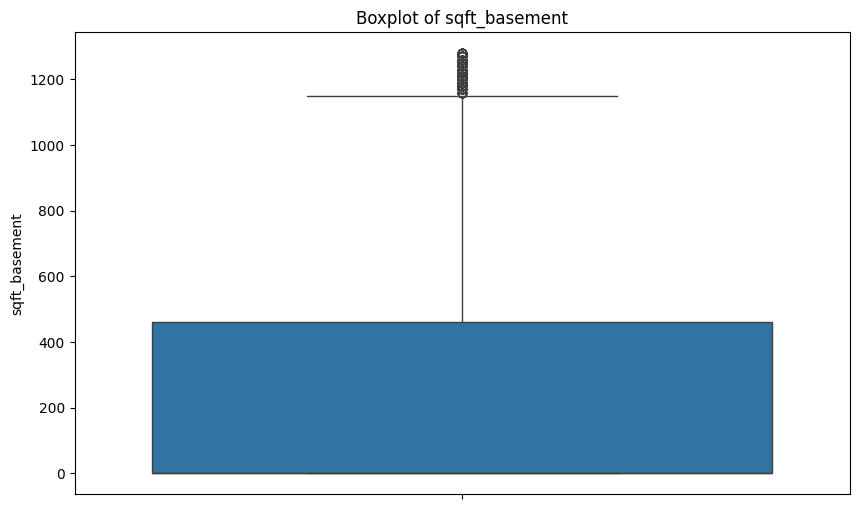

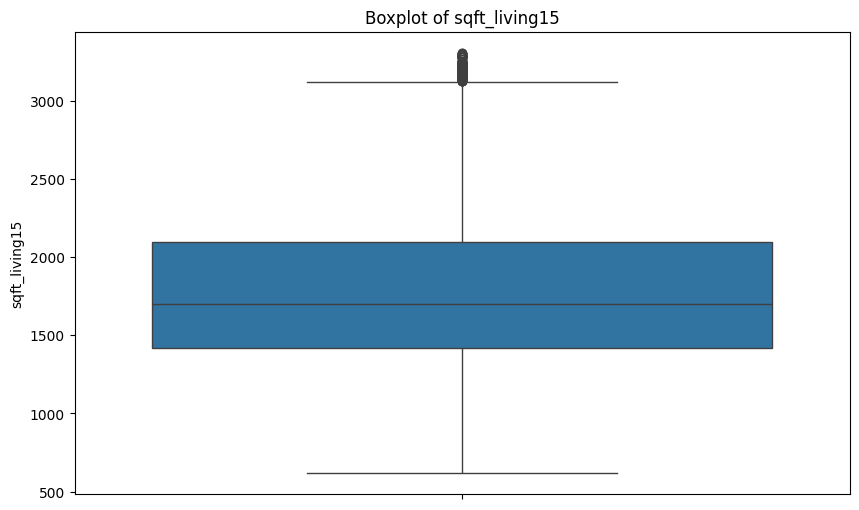

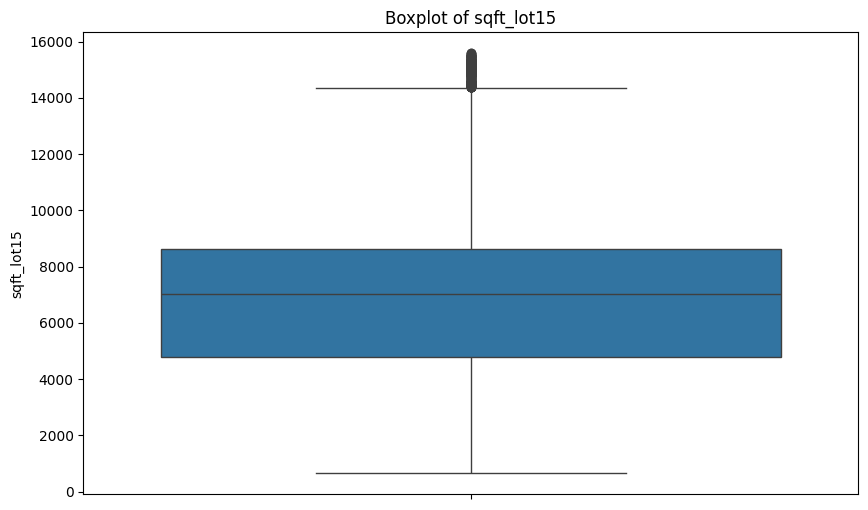

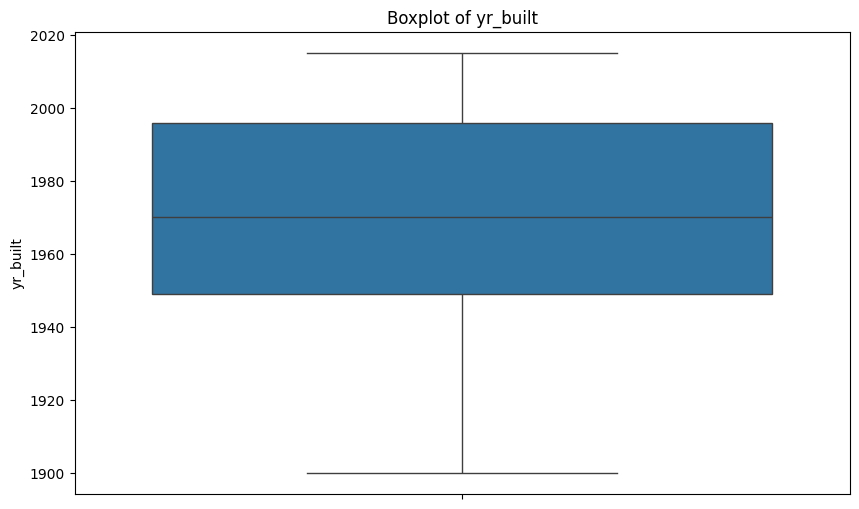

In [27]:
cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built']

# Plot boxplots for each column
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

/tmp/ipykernel_4691/1913720541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renovated['decade_renovated'] = df_renovated['yr_renovated']//10*10


<Axes: xlabel='decade_renovated'>

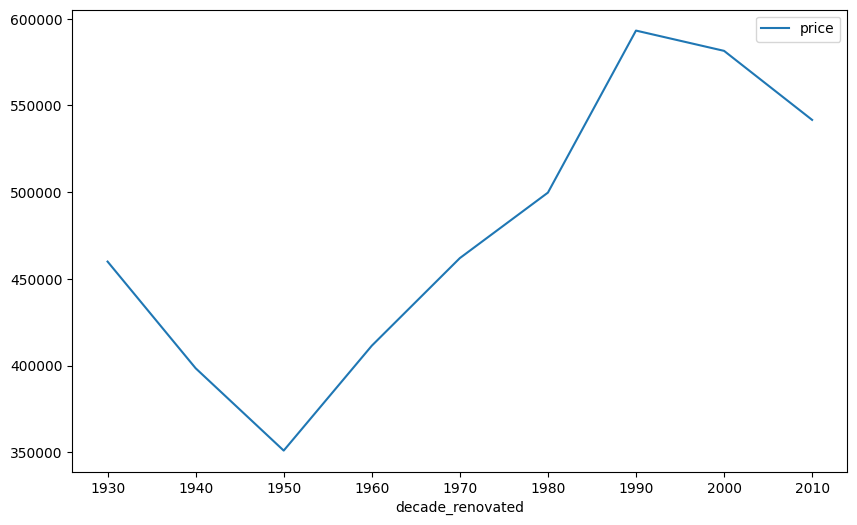

In [29]:
df_renovated = df[df['yr_renovated'] != 0]
df_renovated['decade_renovated'] = df_renovated['yr_renovated']//10*10
df_reno_price = df_renovated.groupby('decade_renovated')['price'].mean().reset_index() 
df_reno_price.plot(x='decade_renovated', y='price', figsize=(10, 6))